In [1]:
# This notebook is a file only including profit curve and some other plot or statistics
import os
import pandas as pd
import numpy as np
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn import preprocessing 

# Import data (for Mac the "\\" might be replaced by "/")
cwd = os.getcwd()
data = pd.read_csv(cwd + "\\WA_Fn-UseC_-Sales-Win-Loss.csv", index_col = 0)

In [2]:
# Data Preparition
data_clean = data.copy()
# Drop rows with opportunity amount 0
data_clean = data_clean.drop(data_clean[data_clean['Opportunity Amount USD'] == 0].index, axis = 0)
# Drop features that should not be used in training and prediction
data_clean = data_clean.drop(['Sales Stage Change Count', 'Elapsed Days In Sales Stage', 
                              'Ratio Days Identified To Total Days',
                              'Ratio Days Qualified To Total Days', 'Ratio Days Validated To Total Days', 
                              'Total Days Identified Through Closing', 'Total Days Identified Through Qualified',
                              'Deal Size Category'], 
                             axis = 1)
# Change opportunity result(our target variable) to numeric
minority = data_clean['Opportunity Result'].value_counts().idxmin()
result = np.array((data_clean['Opportunity Result'] == minority).astype(int))
data_clean = data_clean.drop(['Opportunity Result'], axis = 1)
# For each categorical variables in the dataset, try to assign an unique indicator variable 
#      for each different category
# (This may not be a good step because it adds too many columns, but we'll see)
for col in data_clean.columns:
    if is_string_dtype(data_clean[col]):
        name_set = set(data_clean[col])
        for name in name_set:
            data_clean[' '.join([col, name, 'indicator'])] = (data_clean[col] == name).astype(int)
        data_clean = data_clean.drop([col], axis = 1)
# Check if there is any null value in our dataset
if data_clean.isnull().any().any():
    print('NO!!!!!')
# Gladly, we don't have any

# Normalize our dataset
scale = preprocessing.StandardScaler()
data_clean = pd.DataFrame(scale.fit_transform(data_clean), columns = data_clean.columns)
data_clean['result'] = result

In [3]:
data_clean.describe()

,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Supplies Subgroup Shelters & RV indicator,Supplies Subgroup Motorcycle Parts indicator,Supplies Subgroup Interior Accessories indicator,Supplies Subgroup Car Electronics indicator,Supplies Subgroup Towing & Hitches indicator,Supplies Subgroup Exterior Accessories indicator,...,Region Mid-Atlantic indicator,Route To Market Other indicator,Route To Market Telecoverage indicator,Route To Market Reseller indicator,Route To Market Fields Sales indicator,Route To Market Telesales indicator,Competitor Type Known indicator,Competitor Type Unknown indicator,Competitor Type None indicator,result
count,7.594900e+04,7.594900e+04,7.594900e+04,7.594900e+04,7.594900e+04,7.594900e+04,7.594900e+04,7.594900e+04,7.594900e+04,7.594900e+04,...,7.594900e+04,7.594900e+04,7.594900e+04,7.594900e+04,7.594900e+04,7.594900e+04,7.594900e+04,7.594900e+04,7.594900e+04,75949.000000
mean,-1.218139e-15,1.388359e-14,8.169116e-14,3.129593e-15,-1.345197e-15,5.657752e-15,1.009045e-14,2.720102e-15,1.398922e-14,-1.264065e-14,...,-2.224217e-13,4.302223e-14,-1.515373e-14,-3.925777e-15,-5.005615e-15,-2.018827e-14,4.924558e-14,6.546414e-15,-8.742830e-15,0.227508
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,...,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,0.419226
min,-7.017705e-01,-5.009095e-01,-4.977452e-01,-3.263534e-01,-3.732947e-01,-4.931436e-01,-2.756692e-01,-5.712087e-02,-2.278071e-01,-4.660783e-01,...,-3.288555e-01,-1.919173e-01,-8.787612e-02,-9.092102e-01,-9.512707e-01,-1.734828e-01,-4.276846e-01,-1.632850e+00,-3.660006e-01,0.000000
25%,-5.749904e-01,-5.009095e-01,-4.977452e-01,-3.263534e-01,-3.732947e-01,-4.931436e-01,-2.756692e-01,-5.712087e-02,-2.278071e-01,-4.660783e-01,...,-3.288555e-01,-1.919173e-01,-8.787612e-02,-9.092102e-01,-9.512707e-01,-1.734828e-01,-4.276846e-01,-1.632850e+00,-3.660006e-01,0.000000
50%,-3.288734e-01,-5.009095e-01,-4.977452e-01,-3.263534e-01,-3.732947e-01,-4.931436e-01,-2.756692e-01,-5.712087e-02,-2.278071e-01,-4.660783e-01,...,-3.288555e-01,-1.919173e-01,-8.787612e-02,-9.092102e-01,-9.512707e-01,-1.734828e-01,-4.276846e-01,6.124260e-01,-3.660006e-01,0.000000
75%,1.186121e-01,-5.009095e-01,-4.977452e-01,-3.263534e-01,-3.732947e-01,-4.931436e-01,-2.756692e-01,-5.712087e-02,-2.278071e-01,-4.660783e-01,...,-3.288555e-01,-1.919173e-01,-8.787612e-02,1.099856e+00,1.051225e+00,-1.734828e-01,-4.276846e-01,6.124260e-01,-3.660006e-01,0.000000
max,6.756314e+00,2.745545e+00,2.815859e+00,3.983731e+00,2.678849e+00,2.027807e+00,3.627537e+00,1.750674e+01,4.389679e+00,2.145562e+00,...,3.040849e+00,5.210577e+00,1.137966e+01,1.099856e+00,1.051225e+00,5.764259e+00,2.338172e+00,6.124260e-01,2.732236e+00,1.000000


In [4]:
# Split data into training and test
length = len(data_clean['result'])
train_index = []
test_index = []
for i in range(length):
    train_index.append(i) if np.random.rand() <= 0.8 else test_index.append(i)
data_train = data_clean.iloc[train_index, :]
data_test = data_clean.iloc[test_index, :]

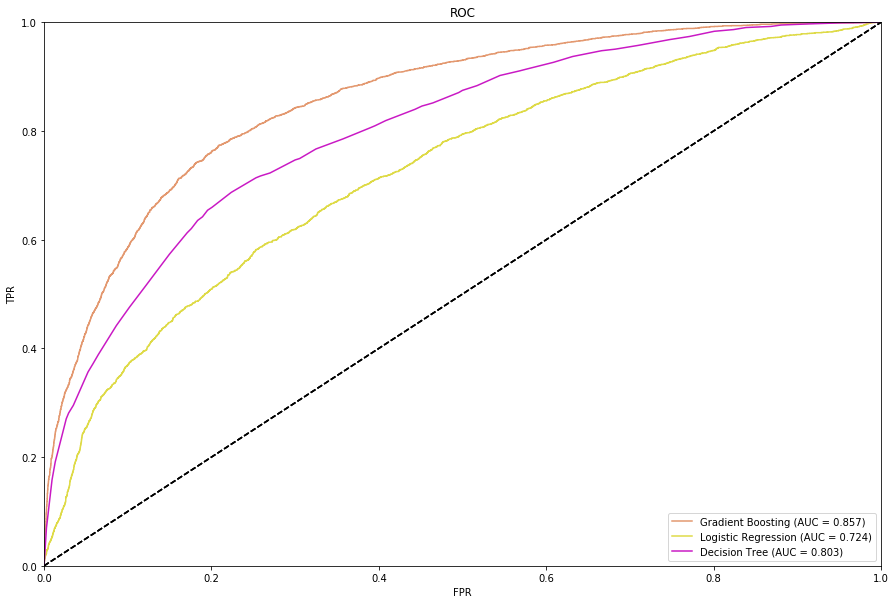

In [5]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.ensemble import GradientBoostingClassifier as GBC
import matplotlib.pyplot as plt
%matplotlib inline
# Firstly, run a Logistic Regression
lg = linear_model.LogisticRegression(C = 1e30)
lg.fit(data_train.drop(['result'], axis = 1), data_train['result'])
result_lg = lg.predict_proba(data_test.drop(['result'], axis = 1))[:, 1]
# And Decision Tree
DT = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 2000, min_samples_leaf = 200)
DT.fit(data_train.drop(['result'], axis = 1), data_train['result'])
result_DT = DT.predict_proba(data_test.drop(['result'], axis = 1))[:, 1]
# And Gradient Boosting
gra_boost = GBC(n_estimators = 1500) 
gra_boost.fit(data_train.drop(['result'], axis = 1), data_train['result'])
result_gbc = gra_boost.predict_proba(data_test.drop(['result'], axis = 1))[:, 1]
def plotROC(preds, truth, name):
    fpr, tpr, thresholds = roc_curve(truth, preds)
    roc_auc = auc(fpr, tpr)
    # chooses a random color for plotting
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    #create the plot
    plt.plot(fpr, tpr, color = c, label = name + ' (AUC = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    
    return roc_auc

# Plot ROC for all models
fig = plt.figure(figsize = (15, 10))
plotROC(result_gbc, data_test['result'], 'Gradient Boosting')
plotROC(result_lg, data_test['result'], 'Logistic Regression')
plotROC(result_DT, data_test['result'], 'Decision Tree')
plt.show()

In [6]:
# Drow a plot relating accuracy for training set and test set with tree nodes
from sklearn.metrics import accuracy_score
acc_train = []
acc_test = []
for i in range(2, 5000):
    dt_plot = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = i)
    dt_plot.fit(data_train.drop(['result'], axis = 1), data_train['result'])
    acc_train.append(accuracy_score(data_train['result'], 
                                    dt_plot.predict(data_train.drop(['result'], axis = 1))))
    acc_test.append(accuracy_score(data_test['result'], 
                                    dt_plot.predict(data_test.drop(['result'], axis = 1))))
x_axis = np.array(range(2, 5000))
fig_dt = plt.figure(figsize = (17,10))
plt.plot(x_axis, acc_train, label = 'Training accuracy')
plt.plot(x_axis, acc_test, label = 'Test accuracy')
plt.xlabel("Tree size(node)")
plt.ylabel('Accuracy')
plt.legend()
plt.show()

KeyboardInterrupt: 

In [ ]:
# Find the tree nodes number that output the best test set prediction accuracy rate
index_max = list(range(2,5000))[np.argmax(acc_test)]
print(str(index_max) + ' has best performace with a accuracy score ' + str(np.max(acc_test)))

In [7]:
# Now try to plot a profit curve
# Firstly, do a train-test split and train classifiers using the best parameter we have found above
X_train = data_train.drop('result', axis = 1)
Y_train = data_train['result']
X_test = data_test.drop('result', axis = 1)
Y_test = data_test['result']
# Now train model decision tree
profit_dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 200,min_samples_leaf = 20) 
profit_dt.fit(X_train, Y_train)
prdt_res = profit_dt.predict_proba(X_test)[:, 1]
# Create a dataframe with oppurtunity amount and predicted probability of success for each instance
profit_df_dtdraft = pd.DataFrame({'result': result[test_index], 
              'Opportunity Amount': data['Opportunity Amount USD'].iloc[test_index].values})
profit_df_dtdraft['Predicted Prob'] = prdt_res
profit_dt_df = profit_df_dtdraft.sort_values(by = 'Predicted Prob', ascending = False)
# Now train logistic regression
profit_lg = linear_model.LogisticRegression(C = 1e30)
profit_lg.fit(X_train, Y_train)
prlg_res = profit_lg.predict_proba(X_test)[:, 1]
# Create a dataframe with oppurtunity amount and predicted probability of success for each instance from lg
profit_df_lgdraft = pd.DataFrame({'result': result[test_index], 
              'Opportunity Amount': data['Opportunity Amount USD'].iloc[test_index].values})
profit_df_lgdraft['Predicted Prob'] = prlg_res
profit_lg_df = profit_df_lgdraft.sort_values(by = 'Predicted Prob', ascending = False)
# Create a function to add a column for cumulative opportunity amount
def add_opportunity_amount(cost, algorithm_df):
    cumulative_profit = []
    gain = algorithm_df['Opportunity Amount'].values
    for i in range(len(gain)):
        if i == 0:
            cumulative_profit.append(gain[0] - cost) # Here assume the very top instance has result success
        else:
            if algorithm_df['result'].iloc[i] == 1:
                cumulative_profit.append(gain[i] + cumulative_profit[i - 1] - cost)
            else:
                cumulative_profit.append(cumulative_profit[i - 1] - cost)
    return cumulative_profit

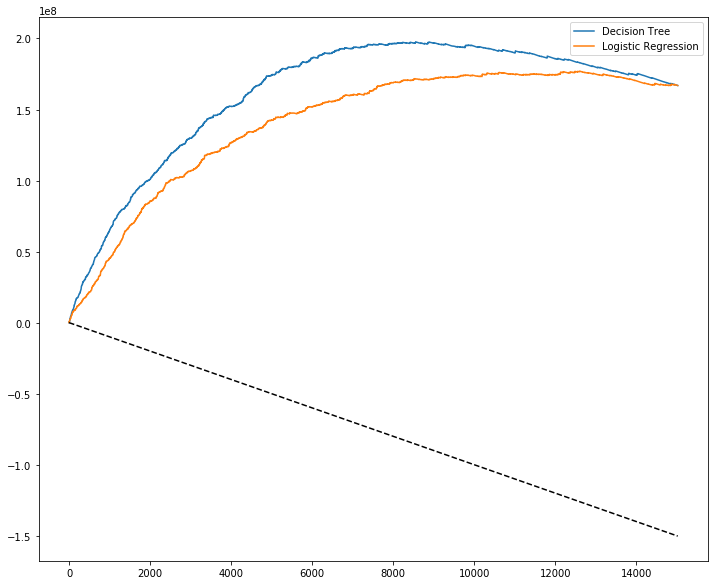

In [22]:
fig = plt.figure(figsize = (12, 10))
cost = 10000 # Change when changing cost
cumulative_profit_dt = add_opportunity_amount(cost, profit_dt_df)
cumulative_profit_lg = add_opportunity_amount(cost, profit_lg_df)
plt.plot(range(len(cumulative_profit_dt)), cumulative_profit_dt, label = 'Decision Tree')
plt.plot(range(len(cumulative_profit_lg)), cumulative_profit_lg, label = 'Logistic Regression')
plt.plot([0, len(cumulative_profit_dt)], [0, cost * -len(cumulative_profit_dt)], 'k--')
plt.legend()
plt.show()

In [16]:
from matplotlib.ticker import FuncFormatter

# Define function for axis labels in million dollars
def millions(x, pos):
    return '$%1.1fM' % (x*1e-6)

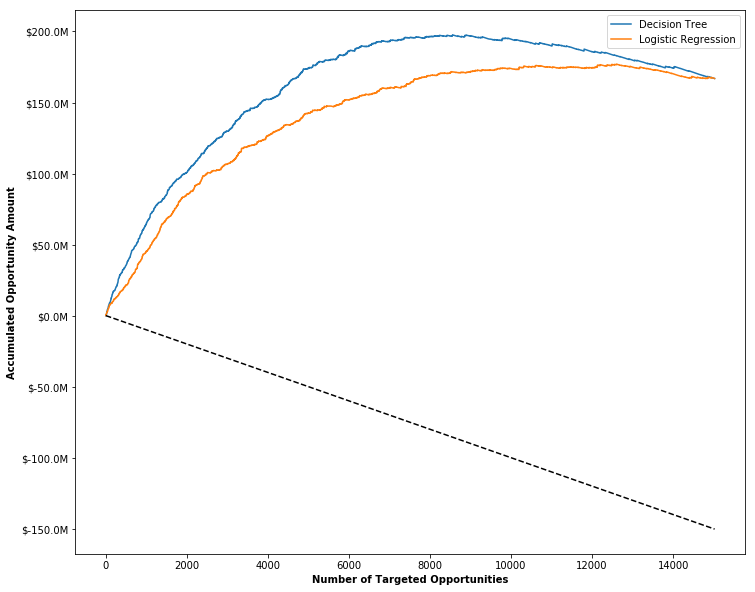

In [21]:
# Here is the same plot as above with axis ticks

# Store both the figure and the axes as variables
f, ax = plt.subplots(figsize=(12,10))

cost = 10000 # Change when changing cost
cumulative_profit_dt = add_opportunity_amount(cost, profit_dt_df)
cumulative_profit_lg = add_opportunity_amount(cost, profit_lg_df)

dt = ax.plot(range(len(cumulative_profit_dt)), cumulative_profit_dt, label = 'Decision Tree')
lr = ax.plot(range(len(cumulative_profit_lg)), cumulative_profit_lg, label = 'Logistic Regression')
base = ax.plot([0, len(cumulative_profit_dt)], [0, cost * -len(cumulative_profit_dt)], 'k--')

# Convert yticks to millions
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

# Add axis labels
plt.xlabel("Number of Targeted Opportunities", fontweight = "bold")
plt.ylabel("Accumulated Opportunity Amount", fontweight = "bold")

plt.legend()
plt.show()